In [122]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [124]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [219]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [221]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [223]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [225]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [227]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [229]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [232]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(desc(Measurement.date)).first()

('2017-08-23',)

<Figure size 640x480 with 0 Axes>

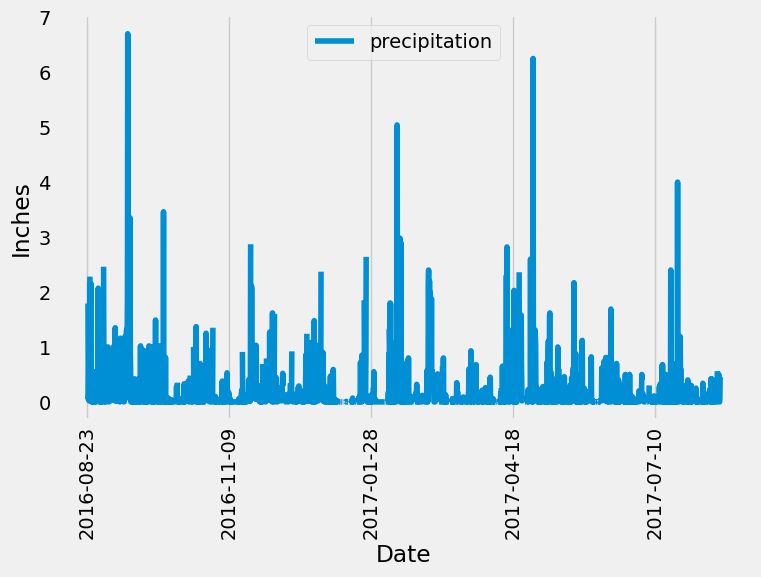

In [307]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Starting from the most recent data point in the database
most_recent_date_points = session.query(Measurement.date).order_by(desc(Measurement.date)).first()

# Calculate the date one year from the last date in data set
most_recent_date = datetime.strptime(most_recent_date_points[0], "%Y-%m-%d")    # converting to required date format

latest_date = (most_recent_date) - timedelta(days = 366)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).\
                                filter(Measurement.date >= latest_date).\
                                all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation, columns = ["Date", "precipitation"])
precipitation_df.set_index("Date", inplace = True)

# Sort the dataframe by date
precipitation_df.sort_index(inplace = True)
plt.clf()

# Use Pandas Plotting with Matplotlib to plot the data
p = precipitation_df.plot(figsize = (8,5))
p.set_xlabel("Date")
p.set_ylabel("Inches")
p.legend(["precipitation"], loc = "upper center")

p.grid(axis = "y")
plt.xticks(rotation = 90)
plt.show()

In [250]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stat = precipitation_df["precipitation"].describe()
summary_df = pd.DataFrame(summary_stat)
summary_df

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [255]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.name)).all()

[(9,)]

In [257]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.id)).\
group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [265]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = "USC00519281"

session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
              filter(Measurement.station == most_active_station_id).first()

(54.0, 85.0, 71.66378066378067)

<Figure size 640x480 with 0 Axes>

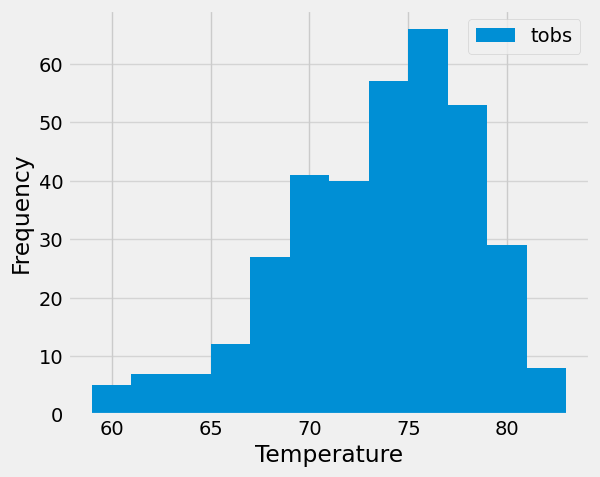

In [309]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_id = "USC00519281"

# Starting from the most recent data point in the database
most_recent_date_points = session.query(Measurement.date).order_by(desc(Measurement.date)).first()

# Calculate the date one year from the last date in data set
most_recent_date = datetime.strptime(most_recent_date_points[0], "%Y-%m-%d")    # converting to required date format

latest_date = (most_recent_date) - timedelta(days = 366)

temperature_data = session.query(Measurement.tobs).\
                                    filter(Measurement.station == most_active_station_id).\
                                    filter(Measurement.date >= latest_date).\
                                    filter(Measurement.date <= most_recent_date).\
                                    all()

# Converting the result into dataframe
temp_df = pd.DataFrame(temperature_data, columns = ["tobs"])
plt.clf()
# plotting the histogram
plt.figure(figsize = (6, 5))
plt.hist(temp_df["tobs"], bins = 12, alpha = 1)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.legend(["tobs"],loc = "upper right")
plt.show()


# Close Session

In [311]:
# Close Session
session.close()